In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [10]:
df_pre = pd.read_csv('../080228-master/080228-master/deeplearning/dataset/wine.csv', header= None)

df = df_pre.sample(frac = 1)

dataset = df.values

x = dataset[:, :12]
y = dataset[:, 12]

In [13]:
model = Sequential()

model.add(Dense(30, input_dim = 12, activation= 'relu'))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(x, y, epochs = 200, batch_size = 200)

Epoch 1/200
33/33 [==============================] - 1s 2ms/step - loss: 1.8175 - accuracy: 0.7539
Epoch 2/200
33/33 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.7559
Epoch 3/200
33/33 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.7805
Epoch 4/200
33/33 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8464
Epoch 5/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9175
Epoch 6/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.9301
Epoch 7/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1987 - accuracy: 0.9315
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9314
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.9337
Epoch 10/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9346
Epoch 11/

33/33 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9826
Epoch 84/200
33/33 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9825
Epoch 85/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9818
Epoch 86/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9806
Epoch 87/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9794
Epoch 88/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9806
Epoch 89/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9820
Epoch 90/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9834
Epoch 91/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9815
Epoch 92/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0566 - accuracy: 0.9823
Epoch 93/200


33/33 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 165/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9841
Epoch 166/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9840
Epoch 167/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9851
Epoch 168/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9849
Epoch 169/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 170/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9846
Epoch 171/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9848
Epoch 172/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9854
Epoch 173/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9838
Epoc

In [14]:
print("accuracy : %.4f" %(model.evaluate(x, y)[1]))

204/204 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.9858
accuracy : 0.9858


In [16]:
model_dir = './model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True)

In [17]:
model.fit(x, y, validation_split= 0.2, epochs= 200, batch_size = 200, verbose = 0, callbacks = [checkpointer])


Epoch 00001: val_loss improved from inf to 0.03699, saving model to ./model\01-0.0370.hdf5

Epoch 00002: val_loss did not improve from 0.03699

Epoch 00003: val_loss did not improve from 0.03699

Epoch 00004: val_loss did not improve from 0.03699

Epoch 00005: val_loss did not improve from 0.03699

Epoch 00006: val_loss did not improve from 0.03699

Epoch 00007: val_loss did not improve from 0.03699

Epoch 00008: val_loss did not improve from 0.03699

Epoch 00009: val_loss did not improve from 0.03699

Epoch 00010: val_loss did not improve from 0.03699

Epoch 00011: val_loss did not improve from 0.03699

Epoch 00012: val_loss did not improve from 0.03699

Epoch 00013: val_loss did not improve from 0.03699

Epoch 00014: val_loss did not improve from 0.03699

Epoch 00015: val_loss did not improve from 0.03699

Epoch 00016: val_loss did not improve from 0.03699

Epoch 00017: val_loss did not improve from 0.03699

Epoch 00018: val_loss did not improve from 0.03699

Epoch 00019: val_loss d


Epoch 00161: val_loss did not improve from 0.03699

Epoch 00162: val_loss did not improve from 0.03699

Epoch 00163: val_loss did not improve from 0.03699

Epoch 00164: val_loss did not improve from 0.03699

Epoch 00165: val_loss did not improve from 0.03699

Epoch 00166: val_loss did not improve from 0.03699

Epoch 00167: val_loss did not improve from 0.03699

Epoch 00168: val_loss did not improve from 0.03699

Epoch 00169: val_loss did not improve from 0.03699

Epoch 00170: val_loss did not improve from 0.03699

Epoch 00171: val_loss did not improve from 0.03699

Epoch 00172: val_loss did not improve from 0.03699

Epoch 00173: val_loss did not improve from 0.03699

Epoch 00174: val_loss did not improve from 0.03699

Epoch 00175: val_loss did not improve from 0.03699

Epoch 00176: val_loss did not improve from 0.03699

Epoch 00177: val_loss did not improve from 0.03699

Epoch 00178: val_loss did not improve from 0.03699

Epoch 00179: val_loss did not improve from 0.03699

Epoch 00180

In [18]:
history = model.fit(x, y, batch_size = 500, epochs = 3500, validation_split= 0.33)

Epoch 1/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0443 - val_accuracy: 0.9865
Epoch 2/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 3/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9876 - val_loss: 0.0327 - val_accuracy: 0.9902
Epoch 4/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 5/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.9878 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 6/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0335 - val_accuracy: 0.9883
Epoch 7/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0416 - accuracy: 0.9881 - val_loss: 0.0331 - val_accuracy: 0.9902
Epoch 8/3500
9/9 [==

Epoch 59/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 60/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 61/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0425 - accuracy: 0.9883 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 62/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0342 - val_accuracy: 0.9897
Epoch 63/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0358 - val_accuracy: 0.9874
Epoch 64/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9887 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 65/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9860 - val_loss: 0.0361 - val_accuracy: 0.9893
Epoch 66/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9887 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 117/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9887 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 118/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9885 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 119/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0407 - accuracy: 0.9887 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 120/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9885 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 121/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9894 - val_loss: 0.0354 - val_accuracy: 0.9879
Epoch 122/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9897 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 123/3500
9/9 [=

Epoch 174/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 175/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0418 - accuracy: 0.9885 - val_loss: 0.0394 - val_accuracy: 0.9879
Epoch 176/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0390 - val_accuracy: 0.9874
Epoch 177/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9878 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 178/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.0354 - val_accuracy: 0.9888
Epoch 179/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 180/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9890 - val_loss: 0.0346 - val_accuracy: 0.9879
Epoch 

9/9 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 232/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 233/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9876 - val_loss: 0.0345 - val_accuracy: 0.9883
Epoch 234/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9894 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 235/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0399 - accuracy: 0.9894 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 236/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 0.9890 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 237/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 238/3500
9/9 [=

Epoch 289/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9897 - val_loss: 0.0438 - val_accuracy: 0.9837
Epoch 290/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0350 - val_accuracy: 0.9879
Epoch 291/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 292/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 293/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9897 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 294/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9908 - val_loss: 0.0354 - val_accuracy: 0.9888
Epoch 295/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0389 - accuracy: 0.9899 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 

9/9 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0374 - val_accuracy: 0.9874
Epoch 347/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0395 - accuracy: 0.9887 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 348/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9892 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 349/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0388 - accuracy: 0.9892 - val_loss: 0.0339 - val_accuracy: 0.9883
Epoch 350/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0420 - accuracy: 0.9878 - val_loss: 0.0338 - val_accuracy: 0.9888
Epoch 351/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0472 - accuracy: 0.9835 - val_loss: 0.0388 - val_accuracy: 0.9865
Epoch 352/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9837 - val_loss: 0.0355 - val_accuracy: 0.9879
Epoch 353/3500
9/9 [=

9/9 [==============================] - 0s 5ms/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 0.0354 - val_accuracy: 0.9879
Epoch 404/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0387 - accuracy: 0.9890 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 405/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 406/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 407/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.0480 - val_accuracy: 0.9860
Epoch 408/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 409/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0413 - val_accuracy: 0.9865
Epoch 410/3500
9/9 [=

9/9 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9892 - val_loss: 0.0336 - val_accuracy: 0.9879
Epoch 461/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9897 - val_loss: 0.0345 - val_accuracy: 0.9888
Epoch 462/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9897 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 463/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9901 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 464/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9890 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 465/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 466/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0366 - accuracy: 0.9897 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 467/3500
9/9 [=

Epoch 518/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0338 - val_accuracy: 0.9888
Epoch 519/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9853 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 520/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0369 - val_accuracy: 0.9883
Epoch 521/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 522/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9897 - val_loss: 0.0356 - val_accuracy: 0.9879
Epoch 523/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9901 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 524/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.9899 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 

Epoch 576/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0405 - accuracy: 0.9885 - val_loss: 0.0349 - val_accuracy: 0.9893
Epoch 577/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 578/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0338 - val_accuracy: 0.9883
Epoch 579/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9903 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 580/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9899 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 581/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0402 - accuracy: 0.9890 - val_loss: 0.0434 - val_accuracy: 0.9851
Epoch 582/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0401 - accuracy: 0.9885 - val_loss: 0.0334 - val_accuracy: 0.9879
Epoch 

Epoch 634/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9899 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 635/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9899 - val_loss: 0.0345 - val_accuracy: 0.9888
Epoch 636/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9901 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 637/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.9899 - val_loss: 0.0336 - val_accuracy: 0.9879
Epoch 638/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9906 - val_loss: 0.0345 - val_accuracy: 0.9888
Epoch 639/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0340 - val_accuracy: 0.9879
Epoch 640/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 

9/9 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9901 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 692/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9903 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 693/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 694/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.0334 - val_accuracy: 0.9879
Epoch 695/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 696/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9899 - val_loss: 0.0354 - val_accuracy: 0.9888
Epoch 697/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 698/3500
9/9 [=

Epoch 749/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 0.9903 - val_loss: 0.0333 - val_accuracy: 0.9883
Epoch 750/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0334 - val_accuracy: 0.9879
Epoch 751/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0365 - val_accuracy: 0.9879
Epoch 752/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9897 - val_loss: 0.0330 - val_accuracy: 0.9883
Epoch 753/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0333 - val_accuracy: 0.9879
Epoch 754/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 755/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.9901 - val_loss: 0.0335 - val_accuracy: 0.9883
Epoch 

Epoch 807/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 808/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 809/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 810/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9897 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 811/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 812/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0332 - val_accuracy: 0.9883
Epoch 813/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0332 - val_accuracy: 0.9874
Epoch 

Epoch 865/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 866/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 867/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 868/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9906 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 869/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9897 - val_loss: 0.0437 - val_accuracy: 0.9851
Epoch 870/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.0391 - val_accuracy: 0.9874
Epoch 871/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0403 - val_accuracy: 0.9865
Epoch 

Epoch 923/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9871 - val_loss: 0.0329 - val_accuracy: 0.9883
Epoch 924/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0354 - val_accuracy: 0.9888
Epoch 925/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0329 - val_accuracy: 0.9893
Epoch 926/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 927/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 928/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 929/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0332 - val_accuracy: 0.9874
Epoch 

9/9 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0334 - val_accuracy: 0.9879
Epoch 981/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9903 - val_loss: 0.0334 - val_accuracy: 0.9874
Epoch 982/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9903 - val_loss: 0.0337 - val_accuracy: 0.9883
Epoch 983/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 984/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0331 - val_accuracy: 0.9879
Epoch 985/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9903 - val_loss: 0.0330 - val_accuracy: 0.9888
Epoch 986/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9903 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 987/3500
9/9 [=

9/9 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0332 - val_accuracy: 0.9883
Epoch 1038/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9903 - val_loss: 0.0331 - val_accuracy: 0.9874
Epoch 1039/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 1040/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9883
Epoch 1041/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9913 - val_loss: 0.0336 - val_accuracy: 0.9879
Epoch 1042/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.0336 - val_accuracy: 0.9879
Epoch 1043/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.0337 - val_accuracy: 0.9879
Epoch 1044/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0331 - val_accuracy: 0.9888
Epoch 1095/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0340 - val_accuracy: 0.9879
Epoch 1096/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0350 - val_accuracy: 0.9888
Epoch 1097/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0374 - val_accuracy: 0.9883
Epoch 1098/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 1099/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 1100/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.9910 - val_loss: 0.0335 - val_accuracy: 0.9874
Epoch 1101/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0353 - val_accuracy: 0.9883
Epoch 1152/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.0334 - val_accuracy: 0.9874
Epoch 1153/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 1154/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0345 - val_accuracy: 0.9879
Epoch 1155/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9910 - val_loss: 0.0347 - val_accuracy: 0.9874
Epoch 1156/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.0327 - val_accuracy: 0.9879
Epoch 1157/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0327 - val_accuracy: 0.9879
Epoch 1158/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9917 - val_loss: 0.0351 - val_accuracy: 0.9879
Epoch 1209/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0353 - val_accuracy: 0.9883
Epoch 1210/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 1211/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0327 - val_accuracy: 0.9879
Epoch 1212/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9913 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 1213/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.0391 - val_accuracy: 0.9888
Epoch 1214/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 1215/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0332 - val_accuracy: 0.9883
Epoch 1266/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0339 - val_accuracy: 0.9879
Epoch 1267/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9913 - val_loss: 0.0338 - val_accuracy: 0.9879
Epoch 1268/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 1269/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 1270/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 1271/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 1272/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 1323/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0337 - val_accuracy: 0.9883
Epoch 1324/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 1325/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0340 - val_accuracy: 0.9879
Epoch 1326/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 1327/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9890 - val_loss: 0.0371 - val_accuracy: 0.9897
Epoch 1328/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0339 - val_accuracy: 0.9883
Epoch 1329/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0353 - val_accuracy: 0.9879
Epoch 1380/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 0.0344 - val_accuracy: 0.9879
Epoch 1381/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9887 - val_loss: 0.0464 - val_accuracy: 0.9869
Epoch 1382/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 1383/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy: 0.9893
Epoch 1384/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0364 - val_accuracy: 0.9883
Epoch 1385/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 1386/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9903 - val_loss: 0.0358 - val_accuracy: 0.9874
Epoch 1437/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9913 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 1438/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9910 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 1439/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0350 - val_accuracy: 0.9888
Epoch 1440/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.0471 - val_accuracy: 0.9869
Epoch 1441/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0412 - val_accuracy: 0.9879
Epoch 1442/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 1443/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0355 - val_accuracy: 0.9879
Epoch 1494/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0355 - val_accuracy: 0.9874
Epoch 1495/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9876 - val_loss: 0.0427 - val_accuracy: 0.9874
Epoch 1496/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9869 - val_loss: 0.0485 - val_accuracy: 0.9860
Epoch 1497/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0389 - val_accuracy: 0.9874
Epoch 1498/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 0.0352 - val_accuracy: 0.9888
Epoch 1499/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 1500/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 1551/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0429 - val_accuracy: 0.9874
Epoch 1552/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0398 - val_accuracy: 0.9897
Epoch 1553/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0401 - val_accuracy: 0.9879
Epoch 1554/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 1555/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0353 - val_accuracy: 0.9879
Epoch 1556/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0357 - val_accuracy: 0.9879
Epoch 1557/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 1608/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0361 - val_accuracy: 0.9888
Epoch 1609/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 1610/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 1611/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0380 - val_accuracy: 0.9888
Epoch 1612/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 1613/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0369 - val_accuracy: 0.9888
Epoch 1614/3500

9/9 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0320 - val_accuracy: 0.9888
Epoch 1665/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 1666/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9894 - val_loss: 0.0386 - val_accuracy: 0.9874
Epoch 1667/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9887 - val_loss: 0.0342 - val_accuracy: 0.9888
Epoch 1668/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0335 - val_accuracy: 0.9883
Epoch 1669/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0336 - val_accuracy: 0.9883
Epoch 1670/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0338 - val_accuracy: 0.9888
Epoch 1671/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0332 - val_accuracy: 0.9888
Epoch 1722/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 1723/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0341 - val_accuracy: 0.9879
Epoch 1724/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 1725/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0334 - val_accuracy: 0.9897
Epoch 1726/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 1727/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.9899 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 1728/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 1779/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0359 - val_accuracy: 0.9879
Epoch 1780/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 1781/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 1782/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 1783/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0348 - val_accuracy: 0.9888
Epoch 1784/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0291 - accuracy: 0.9903 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 1785/3500

9/9 [==============================] - 0s 6ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 1836/3500
9/9 [==============================] - 0s 12ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0341 - val_accuracy: 0.9907
Epoch 1837/3500
9/9 [==============================] - 0s 10ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 1838/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 1839/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0306 - accuracy: 0.9894 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 1840/3500
9/9 [==============================] - 0s 11ms/step - loss: 0.0287 - accuracy: 0.9903 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 1841/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0347 - val_accuracy: 0.9883
Epoch 1842/

9/9 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 1893/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 1894/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0345 - val_accuracy: 0.9897
Epoch 1895/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0279 - accuracy: 0.9901 - val_loss: 0.0378 - val_accuracy: 0.9893
Epoch 1896/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 1897/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0290 - accuracy: 0.9892 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 1898/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 1899/3500

Epoch 1949/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 1950/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 0.9906 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 1951/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.0350 - val_accuracy: 0.9897
Epoch 1952/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 1953/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0346 - val_accuracy: 0.9897
Epoch 1954/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9910 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 1955/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0347 - val_accuracy: 0.9902

Epoch 2006/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0337 - val_accuracy: 0.9902
Epoch 2007/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 2008/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0357 - val_accuracy: 0.9897
Epoch 2009/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0352 - val_accuracy: 0.9897
Epoch 2010/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 2011/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 2012/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0343 - val_accuracy: 0.9893

Epoch 2063/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0355 - val_accuracy: 0.9893
Epoch 2064/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9920 - val_loss: 0.0341 - val_accuracy: 0.9897
Epoch 2065/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9908 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 2066/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 2067/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0371 - val_accuracy: 0.9893
Epoch 2068/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.9897 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 2069/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0370 - val_accuracy: 0.9893

Epoch 2120/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 2121/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0334 - val_accuracy: 0.9902
Epoch 2122/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 2123/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 2124/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0353 - val_accuracy: 0.9897
Epoch 2125/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 2126/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9913 - val_loss: 0.0345 - val_accuracy: 0.9902

9/9 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 2178/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 2179/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 2180/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9913 - val_loss: 0.0339 - val_accuracy: 0.9902
Epoch 2181/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0335 - val_accuracy: 0.9897
Epoch 2182/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0338 - val_accuracy: 0.9897
Epoch 2183/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 2184/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 2235/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0352 - val_accuracy: 0.9902
Epoch 2236/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 2237/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0348 - val_accuracy: 0.9902
Epoch 2238/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0352 - val_accuracy: 0.9897
Epoch 2239/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0354 - val_accuracy: 0.9897
Epoch 2240/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 0.9933 - val_loss: 0.0356 - val_accuracy: 0.9902
Epoch 2241/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0356 - val_accuracy: 0.9902
Epoch 2292/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0358 - val_accuracy: 0.9902
Epoch 2293/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0351 - val_accuracy: 0.9902
Epoch 2294/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.9929 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 2295/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 0.0360 - val_accuracy: 0.9902
Epoch 2296/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0353 - val_accuracy: 0.9897
Epoch 2297/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0280 - accuracy: 0.9897 - val_loss: 0.0357 - val_accuracy: 0.9902
Epoch 2298/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.0424 - val_accuracy: 0.9888
Epoch 2349/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 2350/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0357 - val_accuracy: 0.9902
Epoch 2351/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0398 - val_accuracy: 0.9893
Epoch 2352/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0409 - val_accuracy: 0.9893
Epoch 2353/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0264 - accuracy: 0.9910 - val_loss: 0.0405 - val_accuracy: 0.9893
Epoch 2354/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 2355/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0380 - val_accuracy: 0.9897
Epoch 2406/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 0.0347 - val_accuracy: 0.9911
Epoch 2407/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.0349 - val_accuracy: 0.9897
Epoch 2408/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9943 - val_loss: 0.0364 - val_accuracy: 0.9907
Epoch 2409/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9910 - val_loss: 0.0350 - val_accuracy: 0.9911
Epoch 2410/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0360 - val_accuracy: 0.9911
Epoch 2411/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9890 - val_loss: 0.0374 - val_accuracy: 0.9907
Epoch 2412/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0368 - val_accuracy: 0.9897
Epoch 2463/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9938 - val_loss: 0.0378 - val_accuracy: 0.9902
Epoch 2464/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0358 - val_accuracy: 0.9902
Epoch 2465/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 2466/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0370 - val_accuracy: 0.9902
Epoch 2467/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0378 - val_accuracy: 0.9897
Epoch 2468/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.0365 - val_accuracy: 0.9907
Epoch 2469/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0356 - val_accuracy: 0.9907
Epoch 2520/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0359 - val_accuracy: 0.9911
Epoch 2521/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0348 - val_accuracy: 0.9916
Epoch 2522/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0233 - accuracy: 0.9931 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 2523/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9924 - val_loss: 0.0390 - val_accuracy: 0.9907
Epoch 2524/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0385 - val_accuracy: 0.9902
Epoch 2525/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0278 - accuracy: 0.9901 - val_loss: 0.0364 - val_accuracy: 0.9907
Epoch 2526/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 2577/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0361 - val_accuracy: 0.9907
Epoch 2578/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0360 - val_accuracy: 0.9907
Epoch 2579/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.9915 - val_loss: 0.0357 - val_accuracy: 0.9897
Epoch 2580/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0369 - val_accuracy: 0.9916
Epoch 2581/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0376 - val_accuracy: 0.9911
Epoch 2582/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 2583/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0369 - val_accuracy: 0.9907
Epoch 2634/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.0360 - val_accuracy: 0.9902
Epoch 2635/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 2636/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9940 - val_loss: 0.0373 - val_accuracy: 0.9911
Epoch 2637/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 2638/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0368 - val_accuracy: 0.9897
Epoch 2639/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0381 - val_accuracy: 0.9902
Epoch 2640/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9926 - val_loss: 0.0382 - val_accuracy: 0.9907
Epoch 2691/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0377 - val_accuracy: 0.9902
Epoch 2692/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9940 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 2693/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0385 - val_accuracy: 0.9907
Epoch 2694/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0376 - val_accuracy: 0.9907
Epoch 2695/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9922 - val_loss: 0.0377 - val_accuracy: 0.9921
Epoch 2696/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0365 - val_accuracy: 0.9907
Epoch 2697/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0361 - val_accuracy: 0.9911
Epoch 2748/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 0.0371 - val_accuracy: 0.9911
Epoch 2749/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0363 - val_accuracy: 0.9902
Epoch 2750/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0361 - val_accuracy: 0.9916
Epoch 2751/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0243 - accuracy: 0.9917 - val_loss: 0.0418 - val_accuracy: 0.9897
Epoch 2752/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9924 - val_loss: 0.0390 - val_accuracy: 0.9902
Epoch 2753/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0386 - val_accuracy: 0.9902
Epoch 2754/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.0376 - val_accuracy: 0.9911
Epoch 2805/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 0.0375 - val_accuracy: 0.9916
Epoch 2806/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0374 - val_accuracy: 0.9916
Epoch 2807/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0366 - val_accuracy: 0.9916
Epoch 2808/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0358 - val_accuracy: 0.9902
Epoch 2809/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9947 - val_loss: 0.0366 - val_accuracy: 0.9916
Epoch 2810/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0361 - val_accuracy: 0.9911
Epoch 2811/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0364 - val_accuracy: 0.9907
Epoch 2862/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 0.0390 - val_accuracy: 0.9921
Epoch 2863/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0354 - val_accuracy: 0.9911
Epoch 2864/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.0375 - val_accuracy: 0.9921
Epoch 2865/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.0384 - val_accuracy: 0.9911
Epoch 2866/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0416 - val_accuracy: 0.9893
Epoch 2867/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0401 - val_accuracy: 0.9902
Epoch 2868/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0365 - val_accuracy: 0.9902
Epoch 2919/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.0365 - val_accuracy: 0.9916
Epoch 2920/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.9940 - val_loss: 0.0371 - val_accuracy: 0.9911
Epoch 2921/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.0376 - val_accuracy: 0.9916
Epoch 2922/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0373 - val_accuracy: 0.9911
Epoch 2923/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 0.0357 - val_accuracy: 0.9907
Epoch 2924/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.0370 - val_accuracy: 0.9911
Epoch 2925/3500

9/9 [==============================] - 0s 6ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.0388 - val_accuracy: 0.9897
Epoch 2976/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0363 - val_accuracy: 0.9921
Epoch 2977/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0362 - val_accuracy: 0.9916
Epoch 2978/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.0367 - val_accuracy: 0.9911
Epoch 2979/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0366 - val_accuracy: 0.9921
Epoch 2980/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0442 - val_accuracy: 0.9869
Epoch 2981/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9862 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 2982/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9915 - val_loss: 0.0364 - val_accuracy: 0.9916
Epoch 3033/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.0359 - val_accuracy: 0.9916
Epoch 3034/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0191 - accuracy: 0.9933 - val_loss: 0.0374 - val_accuracy: 0.9902
Epoch 3035/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 3036/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0413 - val_accuracy: 0.9902
Epoch 3037/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0390 - val_accuracy: 0.9897
Epoch 3038/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0373 - val_accuracy: 0.9907
Epoch 3039/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0357 - val_accuracy: 0.9916
Epoch 3090/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0349 - val_accuracy: 0.9916
Epoch 3091/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0376 - val_accuracy: 0.9907
Epoch 3092/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0368 - val_accuracy: 0.9916
Epoch 3093/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0357 - val_accuracy: 0.9921
Epoch 3094/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 3095/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0357 - val_accuracy: 0.9921
Epoch 3096/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0357 - val_accuracy: 0.9916
Epoch 3147/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0372 - val_accuracy: 0.9911
Epoch 3148/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0377 - val_accuracy: 0.9921
Epoch 3149/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9901 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 3150/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 0.9903 - val_loss: 0.0348 - val_accuracy: 0.9916
Epoch 3151/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0388 - val_accuracy: 0.9916
Epoch 3152/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 0.0393 - val_accuracy: 0.9907
Epoch 3153/3500

9/9 [==============================] - 0s 6ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0352 - val_accuracy: 0.9916
Epoch 3204/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.0363 - val_accuracy: 0.9921
Epoch 3205/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0406 - val_accuracy: 0.9907
Epoch 3206/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0390 - val_accuracy: 0.9897
Epoch 3207/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0373 - val_accuracy: 0.9916
Epoch 3208/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0360 - val_accuracy: 0.9930
Epoch 3209/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9947 - val_loss: 0.0384 - val_accuracy: 0.9921
Epoch 3210/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9910 - val_loss: 0.0359 - val_accuracy: 0.9921
Epoch 3261/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9903 - val_loss: 0.0395 - val_accuracy: 0.9888
Epoch 3262/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0338 - val_accuracy: 0.9925
Epoch 3263/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0348 - val_accuracy: 0.9925
Epoch 3264/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0366 - val_accuracy: 0.9921
Epoch 3265/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 0.0391 - val_accuracy: 0.9907
Epoch 3266/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.0362 - val_accuracy: 0.9921
Epoch 3267/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 3318/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0394 - val_accuracy: 0.9916
Epoch 3319/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0391 - val_accuracy: 0.9925
Epoch 3320/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0377 - val_accuracy: 0.9921
Epoch 3321/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0378 - val_accuracy: 0.9921
Epoch 3322/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0379 - val_accuracy: 0.9930
Epoch 3323/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0376 - val_accuracy: 0.9925
Epoch 3324/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0456 - val_accuracy: 0.9902
Epoch 3375/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9922 - val_loss: 0.0558 - val_accuracy: 0.9874
Epoch 3376/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.9922 - val_loss: 0.0456 - val_accuracy: 0.9897
Epoch 3377/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9949 - val_loss: 0.0424 - val_accuracy: 0.9921
Epoch 3378/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0441 - val_accuracy: 0.9897
Epoch 3379/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0392 - val_accuracy: 0.9921
Epoch 3380/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.0416 - val_accuracy: 0.9921
Epoch 3381/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.0452 - val_accuracy: 0.9893
Epoch 3432/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0408 - val_accuracy: 0.9916
Epoch 3433/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9931 - val_loss: 0.0447 - val_accuracy: 0.9921
Epoch 3434/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0400 - val_accuracy: 0.9921
Epoch 3435/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0451 - val_accuracy: 0.9897
Epoch 3436/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.9922 - val_loss: 0.0407 - val_accuracy: 0.9907
Epoch 3437/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0210 - accuracy: 0.9924 - val_loss: 0.0436 - val_accuracy: 0.9916
Epoch 3438/3500

9/9 [==============================] - 0s 5ms/step - loss: 0.0255 - accuracy: 0.9903 - val_loss: 0.0402 - val_accuracy: 0.9916
Epoch 3489/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0280 - accuracy: 0.9887 - val_loss: 0.0412 - val_accuracy: 0.9907
Epoch 3490/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.0383 - val_accuracy: 0.9916
Epoch 3491/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0395 - val_accuracy: 0.9916
Epoch 3492/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0393 - val_accuracy: 0.9930
Epoch 3493/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0430 - val_accuracy: 0.9893
Epoch 3494/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9915 - val_loss: 0.0417 - val_accuracy: 0.9897
Epoch 3495/3500

In [21]:
# 테스트셋 오차 저장
y_vloss = history.history['val_loss']

In [20]:
# 학습셋 정확도 저장
y_acc = history.history['accuracy']

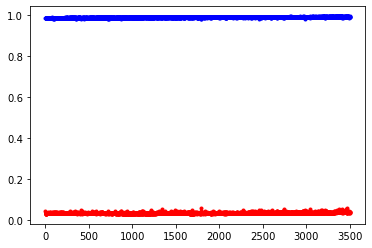

In [22]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = 'red', markersize = 3)
plt.plot(x_len, y_acc, "o", c = 'blue', markersize = 3)
plt.show()
plt.close()

### 모델 학습 중단 설정

In [26]:
model = Sequential()

model.add(Dense(30, input_dim = 12, activation= 'relu'))
model.add(Dense(12, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stropping_callback = EarlyStopping(monitor='val_loss', patience=100)
model.fit(x, y, epochs = 2000, batch_size = 200, callbacks=[early_stropping_callback])

Epoch 1/2000
33/33 [==============================] - 0s 1ms/step - loss: 2.0478 - accuracy: 0.7659
Epoch 2/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.9158
Epoch 3/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9317
Epoch 4/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.9277
Epoch 5/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1842 - accuracy: 0.9340
Epoch 6/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9361
Epoch 7/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9363
Epoch 8/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9389
Epoch 9/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.9423
Epoch 10/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1616 - accuracy: 0.9412

33/33 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9614
Epoch 28/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9623
Epoch 29/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9611
Epoch 30/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9631
Epoch 31/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9661
Epoch 32/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9646
Epoch 33/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9677
Epoch 34/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9672
Epoch 35/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9684
Epoch 36/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9691
Epoc

33/33 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9768
Epoch 55/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9781
Epoch 56/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9786
Epoch 57/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9778
Epoch 58/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9789
Epoch 59/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9794
Epoch 60/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.9771
Epoch 61/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9763
Epoch 62/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9812
Epoch 63/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9800
Epoc

33/33 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9817
Epoch 81/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9811
Epoch 82/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9831
Epoch 83/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9832
Epoch 84/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9821
Epoch 85/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0591 - accuracy: 0.9823
Epoch 86/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9817
Epoch 87/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9812
Epoch 88/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9820
Epoch 89/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9821
Epoc

33/33 [==============================] - 0s 1ms/step - loss: 0.0596 - accuracy: 0.9821
Epoch 108/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9843
Epoch 109/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9825
Epoch 110/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9809
Epoch 111/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9780
Epoch 112/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9852
Epoch 113/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9838
Epoch 114/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9832
Epoch 115/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0584 - accuracy: 0.9837
Epoch 116/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9843
Epoch 134/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9840
Epoch 135/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9843
Epoch 136/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9849
Epoch 137/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0547 - accuracy: 0.9845
Epoch 138/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9837
Epoch 139/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9818
Epoch 140/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9837
Epoch 141/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9848
Epoch 142/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9855
Epoch 160/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9854
Epoch 161/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9858
Epoch 162/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9840
Epoch 163/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9840
Epoch 164/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9840
Epoch 165/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9848
Epoch 166/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9843
Epoch 167/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9852
Epoch 168/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9855
Epoch 186/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9861
Epoch 187/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 188/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9838
Epoch 189/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9865
Epoch 190/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9860
Epoch 191/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9851
Epoch 192/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9866
Epoch 193/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9831
Epoch 194/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9857
Epoch 212/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9869
Epoch 213/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9877
Epoch 214/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9857
Epoch 215/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9872
Epoch 216/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9869
Epoch 217/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9868
Epoch 218/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9874
Epoch 219/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9872
Epoch 220/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9863
Epoch 238/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9861
Epoch 239/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9849
Epoch 240/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9872
Epoch 241/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9846
Epoch 242/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9871
Epoch 243/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9878
Epoch 244/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9880
Epoch 245/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 246/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9886
Epoch 264/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.9886
Epoch 265/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9888
Epoch 266/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9857
Epoch 267/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9868
Epoch 268/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.9874
Epoch 269/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9889
Epoch 270/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9878
Epoch 271/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9834
Epoch 272/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9888
Epoch 290/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9900
Epoch 291/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9885
Epoch 292/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.9892
Epoch 293/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9863
Epoch 294/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9863
Epoch 295/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9858
Epoch 296/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9855
Epoch 297/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9857
Epoch 298/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9892
Epoch 316/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9892
Epoch 317/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9894
Epoch 318/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9898
Epoch 319/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9905
Epoch 320/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9871
Epoch 321/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9891
Epoch 322/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9900
Epoch 323/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9881
Epoch 324/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9897
Epoch 342/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9886
Epoch 343/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9895
Epoch 344/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9889
Epoch 345/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9901
Epoch 346/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9889
Epoch 347/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.9908
Epoch 348/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9905
Epoch 349/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9898
Epoch 350/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9912
Epoch 368/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9900
Epoch 369/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9895
Epoch 370/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9892
Epoch 371/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9898
Epoch 372/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9900
Epoch 373/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0383 - accuracy: 0.9905
Epoch 374/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9912
Epoch 375/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9905
Epoch 376/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9906
Epoch 394/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9898
Epoch 395/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9901
Epoch 396/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9869
Epoch 397/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9906
Epoch 398/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9903
Epoch 399/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.9912
Epoch 400/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9903
Epoch 401/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9900
Epoch 402/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9886
Epoch 420/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9905
Epoch 421/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9908
Epoch 422/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9869
Epoch 423/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9901
Epoch 424/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9908
Epoch 425/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9897
Epoch 426/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9900
Epoch 427/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9889
Epoch 428/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9900
Epoch 446/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9906
Epoch 447/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9894
Epoch 448/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9903
Epoch 449/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9914
Epoch 450/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9901
Epoch 451/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9892
Epoch 452/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 0.9903
Epoch 453/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9900
Epoch 454/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9918
Epoch 472/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9908
Epoch 473/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9917
Epoch 474/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9908
Epoch 475/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9911
Epoch 476/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.9905
Epoch 477/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9878
Epoch 478/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9897
Epoch 479/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9900
Epoch 480/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9908
Epoch 498/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9886
Epoch 499/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9892
Epoch 500/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9909
Epoch 501/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9912
Epoch 502/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9915
Epoch 503/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9923
Epoch 504/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9922
Epoch 505/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9914
Epoch 506/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9915
Epoch 524/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9918
Epoch 525/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9915
Epoch 526/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9917
Epoch 527/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9915
Epoch 528/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9928
Epoch 529/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9923
Epoch 530/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9922
Epoch 531/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9901
Epoch 532/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.9922
Epoch 550/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9928
Epoch 551/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9903
Epoch 552/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9915
Epoch 553/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9917
Epoch 554/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9914
Epoch 555/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9886
Epoch 556/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9917
Epoch 557/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9914
Epoch 558/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9915
Epoch 576/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9908
Epoch 577/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9908
Epoch 578/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9914
Epoch 579/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9917
Epoch 580/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9917
Epoch 581/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9926
Epoch 582/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9914
Epoch 583/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9895
Epoch 584/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9903
Epoch 602/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9885
Epoch 603/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9912
Epoch 604/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9897
Epoch 605/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9917
Epoch 606/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9932
Epoch 607/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9920
Epoch 608/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9911
Epoch 609/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9918
Epoch 610/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.9917
Epoch 628/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9923
Epoch 629/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0293 - accuracy: 0.9914
Epoch 630/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9922
Epoch 631/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9922
Epoch 632/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9917
Epoch 633/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9903
Epoch 634/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9914
Epoch 635/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9923
Epoch 636/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9931
Epoch 654/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9914
Epoch 655/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9922
Epoch 656/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.9931
Epoch 657/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9929
Epoch 658/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 659/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9897
Epoch 660/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9906
Epoch 661/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9923
Epoch 662/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9931
Epoch 680/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9915
Epoch 681/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9923
Epoch 682/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9926
Epoch 683/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9929
Epoch 684/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9926
Epoch 685/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.9920
Epoch 686/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.9928
Epoch 687/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9925
Epoch 688/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9928
Epoch 706/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.9925
Epoch 707/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9917
Epoch 708/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9925
Epoch 709/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9920
Epoch 710/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9923
Epoch 711/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9929
Epoch 712/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9923
Epoch 713/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.9905
Epoch 714/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9911
Epoch 732/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 733/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9926
Epoch 734/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.9928
Epoch 735/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9923
Epoch 736/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 737/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9932
Epoch 738/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9932
Epoch 739/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9929
Epoch 740/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9929
Epoch 758/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9928
Epoch 759/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9934
Epoch 760/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9928
Epoch 761/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9935
Epoch 762/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9923
Epoch 763/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9923
Epoch 764/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9895
Epoch 765/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9863
Epoch 766/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 784/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 785/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9925
Epoch 786/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9935
Epoch 787/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9926
Epoch 788/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 789/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 790/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9931
Epoch 791/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9932
Epoch 792/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9897
Epoch 810/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9926
Epoch 811/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9929
Epoch 812/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9920
Epoch 813/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9929
Epoch 814/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 815/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9932
Epoch 816/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9931
Epoch 817/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 818/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0260 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9922
Epoch 836/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 837/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9938
Epoch 838/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9940
Epoch 839/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9935
Epoch 840/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 841/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 842/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9938
Epoch 843/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9929
Epoch 844/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9934
Epoch 862/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9931
Epoch 863/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 864/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9942
Epoch 865/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9940
Epoch 866/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9920
Epoch 867/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9928
Epoch 868/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 869/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9935
Epoch 870/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0289 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9940
Epoch 888/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9937
Epoch 889/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9938
Epoch 890/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9938
Epoch 891/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9943
Epoch 892/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9940
Epoch 893/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9940
Epoch 894/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9932
Epoch 895/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9948
Epoch 896/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9934
Epoch 914/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9940
Epoch 915/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9931
Epoch 916/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9940
Epoch 917/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9942
Epoch 918/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9937
Epoch 919/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9934
Epoch 920/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9940
Epoch 921/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9938
Epoch 922/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9931
Epoch 940/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9935
Epoch 941/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9943
Epoch 942/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9932
Epoch 943/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 944/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9937
Epoch 945/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9937
Epoch 946/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9931
Epoch 947/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 948/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9937
Epoch 966/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 967/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9937
Epoch 968/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9945
Epoch 969/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 970/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 971/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9914
Epoch 972/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0325 - accuracy: 0.9911
Epoch 973/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 974/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9948
Epoch 992/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9938
Epoch 993/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9938
Epoch 994/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9934
Epoch 995/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9929
Epoch 996/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 997/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9945
Epoch 998/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9948
Epoch 999/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9935
Epoch 1000/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0

33/33 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9946
Epoch 1018/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9925
Epoch 1019/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9937
Epoch 1020/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 1021/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9945
Epoch 1022/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9934
Epoch 1023/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9926
Epoch 1024/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9935
Epoch 1025/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9937
Epoch 1026/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0209 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 1044/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9942
Epoch 1045/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9942
Epoch 1046/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9942
Epoch 1047/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9945
Epoch 1048/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9948
Epoch 1049/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9931
Epoch 1050/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9948
Epoch 1051/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9928
Epoch 1052/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0227 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9940
Epoch 1070/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9946
Epoch 1071/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9937
Epoch 1072/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9942
Epoch 1073/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 1074/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9905
Epoch 1075/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9925
Epoch 1076/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9942
Epoch 1077/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9946
Epoch 1078/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0205 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9926
Epoch 1096/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9931
Epoch 1097/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9940
Epoch 1098/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9925
Epoch 1099/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 1100/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9932
Epoch 1101/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9938
Epoch 1102/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9942
Epoch 1103/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9949
Epoch 1104/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0204 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9937
Epoch 1122/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 1123/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 1124/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9948
Epoch 1125/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9949
Epoch 1126/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 1127/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9951
Epoch 1128/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9935
Epoch 1129/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9920
Epoch 1130/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0199 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9943
Epoch 1148/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 0.9945
Epoch 1149/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9945
Epoch 1150/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9952
Epoch 1151/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9948
Epoch 1152/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9943
Epoch 1153/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 1154/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9938
Epoch 1155/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9942
Epoch 1156/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0206 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 1174/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 1175/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 1176/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 1177/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9945
Epoch 1178/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9945
Epoch 1179/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9946
Epoch 1180/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 1181/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9948
Epoch 1182/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0181 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9937
Epoch 1200/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 1201/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9940
Epoch 1202/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9943
Epoch 1203/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9940
Epoch 1204/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9938
Epoch 1205/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9940
Epoch 1206/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9954
Epoch 1207/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9949
Epoch 1208/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0197 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9949
Epoch 1226/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9951
Epoch 1227/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9935
Epoch 1228/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9945
Epoch 1229/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9952
Epoch 1230/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9951
Epoch 1231/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9951
Epoch 1232/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9949
Epoch 1233/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9940
Epoch 1234/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0189 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9954
Epoch 1252/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9940
Epoch 1253/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9949
Epoch 1254/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9948
Epoch 1255/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9948
Epoch 1256/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9946
Epoch 1257/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9955
Epoch 1258/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9951
Epoch 1259/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 1260/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0201 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 1278/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9949
Epoch 1279/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9952
Epoch 1280/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9935
Epoch 1281/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9948
Epoch 1282/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9955
Epoch 1283/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 1284/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9948
Epoch 1285/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 1286/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0200 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9948
Epoch 1304/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9954
Epoch 1305/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 1306/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9954
Epoch 1307/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9940
Epoch 1308/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9943
Epoch 1309/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9954
Epoch 1310/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9955
Epoch 1311/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9945
Epoch 1312/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0212 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9952
Epoch 1330/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9958
Epoch 1331/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9954
Epoch 1332/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9946
Epoch 1333/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9951
Epoch 1334/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9949
Epoch 1335/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9954
Epoch 1336/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 1337/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 1338/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0259 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 1356/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9920
Epoch 1357/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9925
Epoch 1358/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 1359/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 1360/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9951
Epoch 1361/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9957
Epoch 1362/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9960
Epoch 1363/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 1364/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0157 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9962
Epoch 1382/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 1383/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9954
Epoch 1384/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9940
Epoch 1385/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9946
Epoch 1386/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 1387/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 1388/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9958
Epoch 1389/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9962
Epoch 1390/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0177 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9952
Epoch 1408/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9943
Epoch 1409/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 1410/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9942
Epoch 1411/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9952
Epoch 1412/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 1413/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9951
Epoch 1414/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9957
Epoch 1415/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9943
Epoch 1416/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0196 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 0.9932
Epoch 1434/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 1435/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9957
Epoch 1436/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9949
Epoch 1437/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9958
Epoch 1438/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 1439/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9949
Epoch 1440/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9914
Epoch 1441/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 1442/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0176 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9949
Epoch 1460/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9952
Epoch 1461/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9957
Epoch 1462/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9965
Epoch 1463/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9951
Epoch 1464/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9958
Epoch 1465/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.9963
Epoch 1466/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9955
Epoch 1467/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.9960
Epoch 1468/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0160 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9958
Epoch 1486/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9951
Epoch 1487/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9963
Epoch 1488/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9963
Epoch 1489/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9957
Epoch 1490/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9958
Epoch 1491/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9957
Epoch 1492/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 1493/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9962
Epoch 1494/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0192 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9965
Epoch 1512/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9954
Epoch 1513/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9954
Epoch 1514/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9954
Epoch 1515/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9963
Epoch 1516/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9958
Epoch 1517/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9942
Epoch 1518/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9946
Epoch 1519/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9957
Epoch 1520/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0162 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9955
Epoch 1538/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9957
Epoch 1539/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 1540/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9958
Epoch 1541/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9962
Epoch 1542/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9945
Epoch 1543/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9949
Epoch 1544/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 1545/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9938
Epoch 1546/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0268 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 1564/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9952
Epoch 1565/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9955
Epoch 1566/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 1567/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9969
Epoch 1568/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9954
Epoch 1569/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9952
Epoch 1570/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9957
Epoch 1571/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0141 - accuracy: 0.9968
Epoch 1572/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0157 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9957
Epoch 1590/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 1591/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 1592/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.9960
Epoch 1593/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9962
Epoch 1594/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9966
Epoch 1595/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9949
Epoch 1596/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9949
Epoch 1597/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9963
Epoch 1598/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9943
Epoch 1616/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9908
Epoch 1617/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9874
Epoch 1618/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9932
Epoch 1619/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9958
Epoch 1620/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9966
Epoch 1621/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9958
Epoch 1622/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9963
Epoch 1623/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9966
Epoch 1624/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0142 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9963
Epoch 1642/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9958
Epoch 1643/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9960
Epoch 1644/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9958
Epoch 1645/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 1646/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9957
Epoch 1647/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9963
Epoch 1648/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9960
Epoch 1649/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9963
Epoch 1650/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0148 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 0.9957
Epoch 1668/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9958
Epoch 1669/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 0.9962
Epoch 1670/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9951
Epoch 1671/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9945
Epoch 1672/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 1673/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9940
Epoch 1674/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9928
Epoch 1675/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9957
Epoch 1676/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0144 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9931
Epoch 1694/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9962
Epoch 1695/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9962
Epoch 1696/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9963
Epoch 1697/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9949
Epoch 1698/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9968
Epoch 1699/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9954
Epoch 1700/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9966
Epoch 1701/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9968
Epoch 1702/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9960
Epoch 1720/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9954
Epoch 1721/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9965
Epoch 1722/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9955
Epoch 1723/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9968
Epoch 1724/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9949
Epoch 1725/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9948
Epoch 1726/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9954
Epoch 1727/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9965
Epoch 1728/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0134 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9965
Epoch 1746/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9952
Epoch 1747/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9955
Epoch 1748/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9958
Epoch 1749/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9966
Epoch 1750/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9957
Epoch 1751/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9968
Epoch 1752/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9960
Epoch 1753/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9968
Epoch 1754/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0147 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9955
Epoch 1772/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9969
Epoch 1773/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9958
Epoch 1774/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9969
Epoch 1775/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9962
Epoch 1776/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9972
Epoch 1777/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9969
Epoch 1778/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9963
Epoch 1779/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9958
Epoch 1780/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0207 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9960
Epoch 1798/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9966
Epoch 1799/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9965
Epoch 1800/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9968
Epoch 1801/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9963
Epoch 1802/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9965
Epoch 1803/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9962
Epoch 1804/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9965
Epoch 1805/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9958
Epoch 1806/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0157 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9963
Epoch 1824/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9968
Epoch 1825/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9965
Epoch 1826/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9968
Epoch 1827/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9952
Epoch 1828/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9957
Epoch 1829/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9957
Epoch 1830/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9969
Epoch 1831/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 1832/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0164 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9957
Epoch 1850/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9966
Epoch 1851/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 1852/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9965
Epoch 1853/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9958
Epoch 1854/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9948
Epoch 1855/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 1856/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9948
Epoch 1857/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9962
Epoch 1858/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0164 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9955
Epoch 1876/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 1877/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9962
Epoch 1878/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9945
Epoch 1879/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9968
Epoch 1880/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9969
Epoch 1881/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9955
Epoch 1882/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9962
Epoch 1883/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9974
Epoch 1884/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0129 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9955
Epoch 1902/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9949
Epoch 1903/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9954
Epoch 1904/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 1905/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9932
Epoch 1906/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9949
Epoch 1907/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9968
Epoch 1908/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9960
Epoch 1909/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9965
Epoch 1910/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0129 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9977
Epoch 1928/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9974
Epoch 1929/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9969
Epoch 1930/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9966
Epoch 1931/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9963
Epoch 1932/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9971
Epoch 1933/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9969
Epoch 1934/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9957
Epoch 1935/2000
33/33 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.9965
Epoch 1936/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0178 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9962
Epoch 1954/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9966
Epoch 1955/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 1956/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9962
Epoch 1957/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9966
Epoch 1958/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9962
Epoch 1959/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9968
Epoch 1960/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 1961/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 1962/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0175 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 1980/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9963
Epoch 1981/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9962
Epoch 1982/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9966
Epoch 1983/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9960
Epoch 1984/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9972
Epoch 1985/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9963
Epoch 1986/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9955
Epoch 1987/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9962
Epoch 1988/2000
33/33 [==============================] - 0s 2ms/step - loss: 0.0139 - acc

In [27]:
print("accuracy : %.4f" %(model.evaluate(x, y)[1]))

204/204 [==============================] - 0s 799us/step - loss: 0.0122 - accuracy: 0.9969
accuracy : 0.9969
